<a href="https://colab.research.google.com/github/Bendrox/Open-Source_models_with_HuggingFace/blob/main/HuggingFace_Open_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This notebook presents a series of examples using Hugging Face  models to accomplish various tasks in the fields of NLP, computer vision, and audio. The goal is to demonstrate the versatile capabilities of pretrained models and show how they can be applied.


In [32]:
# First let's connect to HuggingFace
from google.colab import output
import getpass

hf_token = getpass.getpass("Enter your Hugging Face token: ")
!huggingface-cli login --token $hf_token

Enter your Hugging Face token: ··········
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Let’s make sure we have the GPU to run this notebook

In [19]:
!nvidia-smi

Tue Oct 22 16:59:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0              29W /  70W |   2939MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1 - Text generation & Text2text

## 1.1 - Text-generation

In [3]:
pip show transformers

Name: transformers
Version: 4.44.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [4]:
from transformers import pipeline

In [24]:
generator_1 = pipeline(task = "text-generation", model="facebook/blenderbot-400M-distill",
                       device=0)

In [6]:
generator_1("What are some fun activities I can do in the summer?",
            do_sample=False)

[{'generated_text': "What are some fun activities I can do in the winter? Yeah, that's how it goes."}]

## 1.2 - Text2text-generation task

In [23]:
generator_2 = pipeline(task = "text2text-generation",
                       model="facebook/blenderbot-400M-distill",
                       device=0) # Indique au pipeline d'utiliser le premier GPU disponible

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/730M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/62.9k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/310k [00:00<?, ?B/s]

In [8]:
generator_2("What are some fun activities I can do in the summer?", do_sample=False)

[{'generated_text': " I'm not sure, but I'm sure you can find something fun to do.  What do you like to do?"}]

# 2 - Translation & Summarization

## 2.1 - Translation

Here we choose to use : nllb-200-distilled-600M a model capable of translating more than 200 languages.
We opted for bfloat16 quantization, which offers an excellent balance between performance and speed.

In [26]:
import torch

In [27]:
translator = pipeline(task = "translation",
                      model="facebook/nllb-200-distilled-600M",
                      torch_dtype=torch.bfloat16,
                      device=0) # quantization in bfloat a good to compress the model

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

In [11]:
fr_text_translated = translator("What are some fun activities I can do in the winter?",
                             src_lang="eng_Latn",
                             tgt_lang="fra_Latn")

In [12]:
print(fr_text_translated)

[{'translation_text': 'Quelles sont quelques activités amusantes que je peux faire en hiver ?'}]


In [13]:
ru_text_translated = translator("What are some fun activities I can do in the winter?",
                             src_lang="eng_Latn",
                             tgt_lang="rus_Cyrl")

In [14]:
print(ru_text_translated)

[{'translation_text': 'Какие забавные занятия я могу заниматься зимой?'}]


In [15]:
# to have enough free memory to run the rest of the code, please run the following to free up memory on the machine
import gc
gc.collect()

263

## 2.2 - Summarization

In [16]:
from transformers import pipeline

For this task we will use Bart-large-cnn

In [28]:
summarizer = pipeline(task="summarization",
                      model="facebook/bart-large-cnn",
                      torch_dtype=torch.bfloat16,
                      device=0)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [18]:
text = """Paris is the capital and most populous city of France, with
          an estimated population of 2,175,601 residents as of 2018,
          in an area of more than 105 square kilometres (41 square
          miles). The City of Paris is the centre and seat of
          government of the region and province of Île-de-France, or
          Paris Region, which has an estimated population of
          12,174,880, or about 18 percent of the population of France
          as of 2017."""

In [19]:
sum = summarizer(text,
                 min_length=10, # paramerters of the summary
                     max_length=50) # paramerters of the summary
print(sum)

[{'summary_text': 'Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018. The City of Paris is the centre and seat of government of the region and province of Île-'}]


Ouput summary  :  Paris is the capital and most populous city of France, with an estimated population of 2,175,601 residents as of 2018. The City of Paris is the centre and seat of government of the region and province of Île

# 3 - Sentence Embedding / Similarity

Determining the similarity between two sentences by measuring how closely they resemble each other :


In [ ]:
pip install -U sentence-transformers

In [31]:
from sentence_transformers import SentenceTransformer
from tqdm.autonotebook import tqdm, trange

In [ ]:
model_similarity = SentenceTransformer("all-MiniLM-L6-v2")

In [5]:
sentences1 = ['The cat sits outside',
              'A man is playing guitar',
              'The movies are awesome']

In [6]:
embedding_1 = model_similarity.encode(sentences1,
                                      convert_to_tensor=True)
print(embedding_1)

tensor([[ 0.1392,  0.0030,  0.0470,  ...,  0.0641, -0.0163,  0.0636],
        [ 0.0227, -0.0014, -0.0056,  ..., -0.0225,  0.0846, -0.0283],
        [-0.1043, -0.0628,  0.0093,  ...,  0.0020,  0.0653, -0.0150]],
       device='cuda:0')


Here each row of the embedding_1 matrix represents a vector of embeddings for a specific sentence.

The columns (here, 384 dimensions) correspond to the numerical values ​​which represent the semantic characteristics of each sentence.

In [7]:
sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

In [8]:
embedding_2 = model_similarity.encode(sentences2,
                                      convert_to_tensor=True)
print(embedding_2)

tensor([[ 0.0163, -0.0700,  0.0384,  ...,  0.0447,  0.0254, -0.0023],
        [ 0.0054, -0.0920,  0.0140,  ...,  0.0167, -0.0086, -0.0424],
        [-0.0842, -0.0592, -0.0010,  ..., -0.0157,  0.0764,  0.0389]],
       device='cuda:0')


Calculate the cosine similarity between two sentences as a measure of how similar they are to each other :

In [9]:
from sentence_transformers import util

In [10]:
cosine_scores = util.cos_sim(embedding_1, embedding_2)
print(cosine_scores)

tensor([[ 0.2838,  0.1310, -0.0029],
        [ 0.2277, -0.0327, -0.0136],
        [-0.0124, -0.0465,  0.6571]], device='cuda:0')


Cosine similarity typically varies from -1 to 1:

- Values near to 1: The vectors are identical, meaning that the sentences are very similar or identical in terms of semantics.

- Values near to 0: The vectors are orthogonal, indicating that there is no similarity between the sentences (no semantic relationship).
- Values near to -1: The vectors are opposite, which would indicate negative similarity (which is rare in cases of semantic sentence embeddings).

In [12]:
for sent1, sent2, score in zip(sentences1, sentences2, cosine_scores.diagonal()):
    print(f"{sent1} \t\t {sent2} \t\t Score: {score:.4f}")

The cat sits outside 		 The dog plays in the garden 		 Score: 0.2838
A man is playing guitar 		 A woman watches TV 		 Score: -0.0327
The movies are awesome 		 The new movie is so great 		 Score: 0.6571


# 4 - Audio classification (Zero short)

The task is to classify an audio (barking of a dog) :

In [ ]:
!pip install datasets
!pip install soundfile
!pip install librosa

In [ ]:
from datasets import load_dataset, load_from_disk
from transformers import pipeline

In [37]:
dataset = load_dataset("ashraq/esc50", # This dataset is a collection of different sounds of 5 seconds
                       split="train[0:10]")


Repo card metadata block was not found. Setting CardData to empty.


In [6]:
audio_sample_1 = dataset[0]

In [7]:
audio_sample_1

{'filename': '1-100032-A-0.wav',
 'fold': 1,
 'target': 0,
 'category': 'dog',
 'esc10': True,
 'src_file': 100032,
 'take': 'A',
 'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 44100}}

In [8]:
from IPython.display import Audio as AudioDisp


In [9]:
AudioDisp(audio_sample_1["audio"]["array"], #signal audio stocké sous forme de tableau NumPy ou de liste Python
             rate=audio_sample_1["audio"]["sampling_rate"]) #taux d'échantillonnage : info  pour jouer l'audio à la vitesse originale

For this task we will use CLAP. This model take both text as candidate_labels and audio as input. The model computes the similarity between both. If text strongly correlated with the audio, you will have a high score.

 CLAP is based on Contrastive learning. This ML technique has shown remarkable success in the field of multimodal representation learning. The central idea is to get the model to learn which data are similar and which are not, by maximizing the similarity between similar pairs and minimizing the similarity between dissimilar pairs.

In [40]:
zero_shot_classifier = pipeline(
    task="zero-shot-audio-classification",
    model="laion/clap-htsat-unfused",
    device = 0)

First, let's determine the sampling rate input expected by the model. This is a very important information since it have a huge influence on how the model will interpret the information.

As a reminder the sampling rate is the number of times per second that an analog audio signal is measured (sampled) to be converted to a digital signal. It is expressed in hertz (Hz) or kHz (kilohertz).

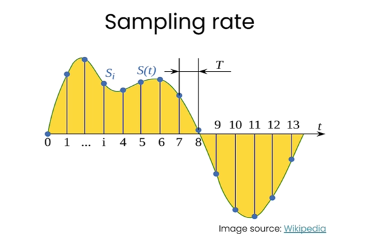

In [14]:
zero_shot_classifier.feature_extractor.sampling_rate

48000

It seems that the model was created using the 48 KHz audio. But what about our data?

In [15]:
audio_sample_1["audio"]["sampling_rate"]

44100

Seems ok since 44100 may not be a big difference. Let's cast it  

In [16]:
from datasets import Audio
dataset = dataset.cast_column(
    "audio",
     Audio(sampling_rate=48_000))

In [17]:
audio_sample = dataset[0]
audio_sample

{'filename': '1-100032-A-0.wav',
 'fold': 1,
 'target': 0,
 'category': 'dog',
 'esc10': True,
 'src_file': 100032,
 'take': 'A',
 'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 48000}}

In [18]:
candidate_labels = ["dog",
                    " vacuum cleaner"]

In [19]:
zero_shot_classifier(audio_sample["audio"]["array"],
                     candidate_labels=candidate_labels)

[{'score': 0.9984489679336548, 'label': 'dog'},
 {'score': 0.0015510071534663439, 'label': ' vacuum cleaner'}]

If text strongly correlated with the audio, you will have a high score which is our case. Let's try some other lables :

In [20]:
candidate_labels = ["Sound of a child crying",
                    "Sound of vacuum cleaner",
                    "Sound of a bird singing",
                    "Sound of an airplane"]

In [21]:
zero_shot_classifier(audio_sample["audio"]["array"],
                     candidate_labels=candidate_labels)

[{'score': 0.6172530055046082, 'label': 'Sound of a bird singing'},
 {'score': 0.21602635085582733, 'label': 'Sound of vacuum cleaner'},
 {'score': 0.12547191977500916, 'label': 'Sound of an airplane'},
 {'score': 0.04124866798520088, 'label': 'Sound of a child crying'}]

# 5 - Speech to text (with Gradio app)

Audio recording to a text. Here, we are loading an audio dataset ( librispeech_asr corpus of 1k hours from narrative audiobooks) in streaming mode.

## 5 .1 - Automatic speech recognition (to text)

In [ ]:
!pip install datasets
!pip install soundfile
!pip install librosa # to extract characteristics from audio: tempo, frequency spectrum, chroma (musical characteristics), tone...
!pip install gradio

In [3]:
from datasets import load_dataset
from transformers import pipeline

In [ ]:
dataset = load_dataset("librispeech_asr",
                       split="train.clean.100",
                       streaming=True,
                       trust_remote_code=True)

In [5]:
example = next(iter(dataset))
example

{'file': '374-180298-0000.flac',
 'audio': {'path': '374-180298-0000.flac',
  'array': array([ 7.01904297e-04,  7.32421875e-04,  7.32421875e-04, ...,
         -2.74658203e-04, -1.83105469e-04, -3.05175781e-05]),
  'sampling_rate': 16000},
 'text': 'CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE BEGINNING OF THIS LIAISON IN A FEW LINES BUT I WANTED YOU TO SEE EVERY STEP BY WHICH WE CAME I TO AGREE TO WHATEVER MARGUERITE WISHED',
 'speaker_id': 374,
 'chapter_id': 180298,
 'id': '374-180298-0000'}

In [6]:
# here access to the 5 first audio
dataset_head = dataset.take(5)

In [7]:
from IPython.display import Audio as IPythonAudio

IPythonAudio(example["audio"]["array"],
             rate=example["audio"]["sampling_rate"])

In hugginFace Whisper (from Open AI) seems to be the best one. Cloud be applied to 96 languages.

In [14]:
asr = pipeline(task="automatic-speech-recognition",
               model="distil-whisper/distil-small.en", #distil language that work with ENG
               device= 0)

In [9]:
asr.feature_extractor.sampling_rate

16000

In [10]:
asr.feature_extractor.sampling_rate

16000

In [11]:
example['audio']['sampling_rate']

16000

OK they are the same

In [12]:
asr(example["audio"]["array"])

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


{'text': ' Chapter 16 I might have told you of the beginning of this liaison in a few lines, but I wanted you to see every step by which we came. I too agree to whatever Marguerite wished.'}

In [13]:
example["text"]

'CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE BEGINNING OF THIS LIAISON IN A FEW LINES BUT I WANTED YOU TO SEE EVERY STEP BY WHICH WE CAME I TO AGREE TO WHATEVER MARGUERITE WISHED'

Seems that the output of the model is good enough.

## 5.2 - Implementing Recording - Text transcription (with Gradio app)


Gradio is an open-source Python library that allows to easily create simple and accessible interactive user interfaces (UIs) for ML models or GenAI app.



In [ ]:
!pip install gradio

In [16]:
import gradio as gr
import os

Two options in Gradio :

1 - The line demo = gr.Blocks() initializes a Gradio Blocks object. Gradio's Blocks is a flexible framework for creating complex, multi-step user interfaces. Blocks allows you to structure your UI with multiple components (like buttons, text inputs, images, etc.) and organize them into containers. More suitable for complex workflows /dashboards.

2- Use simpler gr.Interface, which is designed for quick, single-function interfaces. More suitable for simple workflows.

In [17]:
demo = gr.Blocks() #initializes a Gradio Blocks object
# here defines the Gradio UI layout, and everything inside it (text inputs, buttons, etc.)

In [18]:
#for transcribing audio files into text using ASR function
def transcribe_speech(filepath):
    if filepath is None:
        gr.Warning("No audio found, please retry.")
        return ""
    output = asr(filepath)
    return output["text"]

In [ ]:
#To upload files for transcription
mic_transcribe = gr.Interface( #creates a simple web interface for running functions interactively
    fn=transcribe_speech, #inject the function to be executed
    inputs=gr.Audio(sources="microphone", # add component to allows the user to record or upload audio. microphone as the audio source.
                    type="filepath"), # the audio will be recorded  here from the user's microphone.
    outputs=gr.Textbox(label="Transcription", # to show the transcription result
                       lines=3),
    allow_flagging="never") # used to mark or report problematic outputs.

In [20]:
#To upload files for transcription
file_transcribe = gr.Interface(
    fn=transcribe_speech,
    inputs=gr.Audio(sources="upload",
                    type="filepath"),
    outputs=gr.Textbox(label="Transcription",
                       lines=3),
    allow_flagging="never")

In [21]:
with demo: #create env for structuring the app + demo = gr.gradio() permet de regrouper et de structurer différents composants
    gr.TabbedInterface(
        [mic_transcribe,
         file_transcribe],
        ["Transcribe Microphone", # attributing names to functions
         "Transcribe Audio File"],# attributing names to functions
    )

In [22]:
#starts the Gradio interface. It launches on local server
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a161ab40b887cdabf5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Warning:** the model does not accept as an input:

1 ) Two channel stereo audio to create spatiality in the sound. We will have to convert to mono before uploading to the application (case of most models)



In [ ]:
# Case 1: We have a sterio sound :
# Solultion :  convert a sound to mono
# audio.shape() # to see of mono or sterio sound
# import numpy as np
# import librosa
# audio_transposed = np.transpose(audio)
# audio_transposed.shape #nbr of chanel 1er + data
# IPythonAudio(audio_mono,rate=sampling_rate)
# asr(audio_mono)

2 ) More than 30 s recording. In this case, we will have to make chunks. Many technnics /stategies could be deployed in order to inclure an overlap.

In [ ]:
# Case 2: We have more than 30 s recording
# Since the model accept only 30s recording we do chunks and add over lap to merge the transcriptions accordinly
# the pipeline handels the chunks in parallel
# asr( audio_16KHz,
   # chunk_length_s=30, # 30 seconds
   # batch_size=4, #larger need more memory
   # return_timestamps=True, # enable predicting segment level timestamps for the audio data that indicate start & end time
                            # + alignes the transcriptions with the input audio
                            # for subtitles + searching specific + cutting the audio
   # )["chunks"]

#def transcribe_long_form(filepath):
   # if filepath is None:
   #     gr.Warning("No audio found, please retry.")
   #     return ""
   # output = asr(
   #  filepath,
   #   max_new_tokens=256,   #here add arg
   #   chunk_length_s=30,    #here add arg
   #  batch_size=8,          #here add arg
   # )
   # return output["text"]



3) Frenquency could deffer between the model format input and the audio recorgind

In [ ]:
# Case 3: Frequency /quality dif
# asr.feature_extractor.sampling_rate check the model input format
# audio_16KHz = librosa.resample(audio_mono,orig_sr=sampling_rate,target_sr=16000) # reshape Hz

# 6 - Text to Speech

Here we will be comparing 3 different models for out Text to Speech task.

## 6.1 - facebook/mms-tts-fra model


- This model is part of Meta's Massively Multilingual Speech project, offering high-quality, natural-sounding speech for French. The output voice of the model is clear but voice customization seems limited, as it primarily uses a standard voice without options for choosing different styles or tones.



In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-to-speech", model="facebook/mms-tts-fra", device = 0)

In [6]:
output_fr = pipe("Bonjour, comment va tu ?")
# Lire l'audio directement sans le sauvegarder
from IPython.display import Audio
Audio(output_fr["audio"], rate=16000, autoplay=True)

## 6.2 - Bark model

- Bark is an highly-controllable text-to-speech model, meaning you can use with various settings, as we are going to see. This model have been designed for expressive, natural speech synthesis and can include effects like laughter or sighs. It supports multiple languages, including French, and excels in generating diverse and lively voices. Ideal for creative projects, games, and storytelling.


In [ ]:
from transformers import BarkModel

model = BarkModel.from_pretrained("suno/bark-small")

In [2]:
#Place the model to an accelerator device if available.
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)

Load `BarkProcessor` in order to be able to pre-process the inputs.

The processor role here is two-sides:
1. Tokenize the input text, i.e. to cut it into small pieces that the model can understand.
2. Stores speaker embeddings, i.e voice presets that can condition the generation.

In [3]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("suno/bark")

In [7]:
# prepare the inputs
voice_preset = "v2/fr_speaker_1"

text_prompt = "[clears throat] Salut, comment vas tu?"
inputs = processor(text_prompt, voice_preset=voice_preset)

In [ ]:
# generate speech
speech_output = model.generate(**inputs.to(device))

In [9]:
from IPython.display import Audio
sampling_rate = model.generation_config.sample_rate
Audio(speech_output[0].cpu().numpy(), rate=sampling_rate)

## 6.3 - Speecht5_tts model


- SpeechT5 Microsoft's SpeechT5 provides clear, smooth, and natural speech, with good multilingual support. It is best for formal uses like user interfaces and document narration. While the model allows some voice adjustments, customization is more limited compared to Bark, offering mainly neutral and professional-sounding voices .

In [ ]:
pip install datasets

In [ ]:
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device=0)
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

In [12]:
import torch
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0) #

In [13]:
# You can replace this embedding with your own as well.

speech = synthesiser("Hello ! how are you ?", forward_params={"speaker_embeddings": speaker_embedding})
sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

In [14]:
from IPython.display import Audio

# Lire le fichier audio généré
Audio("speech.wav", autoplay=True)

# 7 - Image Object detection

In [ ]:
!pip install transformers gradio torch torchvision

In [2]:
import torch
from transformers import DetrForObjectDetection, DetrImageProcessor
import gradio as gr
from PIL import Image, ImageDraw, ImageFont

In [ ]:
# Charger le modèle et le processeur
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')
processor = DetrImageProcessor.from_pretrained('facebook/detr-resnet-50')

In [ ]:

# Importer les bibliothèques
from transformers import pipeline
import gradio as gr
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_tensor, to_pil_image

# Créer le pipeline de détection d'objets
object_detector = pipeline('object-detection', model='facebook/detr-resnet-50')

# Définir la fonction de détection d'objets
def detect_objects(image):
    # Obtenir les prédictions
    results = object_detector(image)

    # Convertir l'image en tenseur
    image_tensor = to_tensor(image).mul(255).byte()

    # Préparer les boîtes et les étiquettes
    boxes = []
    labels = []
    for result in results:
        boxes.append([
            result['box']['xmin'],
            result['box']['ymin'],
            result['box']['xmax'],
            result['box']['ymax']
        ])
        labels.append(f"{result['label']} {result['score']:.2f}")

    if boxes:
        boxes = torch.tensor(boxes, dtype=torch.int)
        # Dessiner les boîtes sur l'image
        image_with_boxes = draw_bounding_boxes(
            image_tensor, boxes, labels=labels, colors="red", width=2, font_size=20
        )
        # Convertir en image PIL
        image_with_boxes = to_pil_image(image_with_boxes)
    else:
        # Si aucune boîte n'est détectée, retourner l'image originale
        image_with_boxes = image

    return image_with_boxes

In [6]:
# Créer l'interface Gradio
demo = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="pil"),
    outputs=gr.Image(type="pil"),
    title="Object-detection with detr-resnet-50",
    description="Chargez une image et le modèle détectera les objets."
)

# Lancer l'application
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dd5f2b8956834052bf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 8 - Multimodels : Image Captioning (Bleep)


Here the task will consiste of generating a text (like a descripiton) from an image. Two type:
- Conditionnal : need to give the start of the sentense.
- Unconditionnal: no need to give any input.

Bellow we are choose to do the unconditionnal one.

In [7]:
from transformers import BlipForConditionalGeneration

In [8]:
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [9]:
from transformers import AutoProcessor

In [ ]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-image-captioning-base")

In [16]:
#Option 1: directly upload
from PIL import Image
from google.colab import files
uploaded = files.upload()

Saving 22.jpeg to 22.jpeg


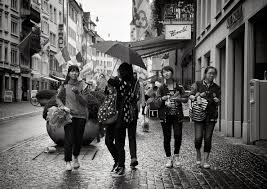

In [17]:
filename = next(iter(uploaded))
image = Image.open(filename)
image

The second option allows for importing large images from Google Drive. This option should be enabled only when dealing with multiple files or images with large file sizes.

In [ ]:
# Option 2:
#from PIL import Image
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#from PIL import Image
# Chemin vers votre fichier dans Google Drive
#image_path = '/content/drive/MyDrive/Images/11.jpeg'
# Charger l'image
#image = Image.open(image_path)
#image

In [18]:
inputs = processor(image,return_tensors="pt")

In [19]:
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a group of people walking down a street


# 9 - Visual Q&A Multimodel

Here the aim of the exercise is to ask a question about the picture and get the answer from the model based on the picture.
AutoProcessor vous permet de charger un processor adapté au modèle que vous utilisez sans avoir à connaître le nom exact du processor spécifique.

In [20]:
from transformers import BlipForQuestionAnswering

In [21]:
model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

In [ ]:
#load a processor suitable for the model you are using without having to know the exact name of the specific processor
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")

In [23]:
#upload the picture
from PIL import Image
from google.colab import files
uploaded = files.upload()

Saving 2.jpg to 2 (1).jpg


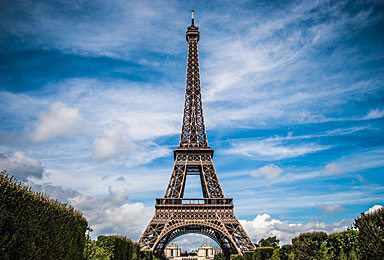

In [24]:
# Extract the  name
filename = next(iter(uploaded))
image = Image.open(filename)
image

In [25]:
question = " what is in the picture ?  "

In [26]:
from PIL import Image
inputs = processor(image, question, return_tensors="pt")

In [27]:
out = model.generate(**inputs)

In [28]:
print(processor.decode(out[0], skip_special_tokens=True))

eiffel tower
